## Recommendation

## Introduction

The main idea is, given a user, you want to get a ranked list of items which the user might like . Items could be movies (netflix), restaurants (zomato), items to shop (Amazon)

## How is this different from Ranking ? (Learning to Rank/LTR)

In brief, LTR algorithms need a user provided query
Recommendation engines do not in general, they look at the user profile and suggest recommendations, without the need for a query

Of course, its not so clear cut as all that, even in recomm. engines, there is search (like searching for a movie in netflix)

But if you think of 3 broad inputs - list of items, query, and user profile

In general, LTR uses query and list of items; and recommendation uses user profile and list of items

You could certainly have a common system which uses all 3

There are some other operational differences, since recommendation systems use user profile input, they are often personalized, and hence need to handle sparsity better

Also, ranking systems should answer the query; whereas for recommendations, in addition to showing only what the user wants, you might want to encourage some diversity

## Types

Typically classified into 

1) Content Based filtering
    Based on current user profile, and featurization of all items in the catalogue - So recommendation is done based on the content of the items, hence the name

2) Collaborative filtering
    Based on current user profile, and featurization of all other users, to see which user(s) are most similar to current user, and recommend items based on that

3) Hybrid filtering
    Based on current user profile, and featurization of all other items and all other users both


In addition, each of these can be categorized into model based and memory based, depending on whether a model is used


### Content based Filtering

1) Based on current user profile, and featurization of all items in the catalogue
2) Best suited where there is known data on all items, and also how the user interacted with items in the past; but limited personal information on user
3) Most closest to ranking system, where in a sense, the user profile is the query, and we want to rank all the items based on it
4) More formally, the utility u(c, i) of item i for user c is estimated based on the utilities assigned by the same user c to other items seen before

As mentioned earlier, you could have a memory based content based filtering, or model based

#### Memory based content based filtering



Here, assign the user a representation (embedding) which is a weighted sum of embeddings of all the items the user has rated in the past, the weights are the user provided rankings

So something like this

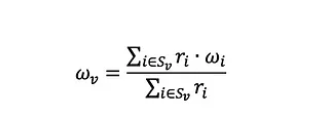

wv is the representation of the user v,
ri is the rank the user v gave for item i in the past
wi is the representation of item i

Now when a new item j comes in,
cosine_similary(wj, wv) will give you how similar item j is for user v

#### Model based content based filtering

Here, we use a model
A simple modeling choice is Naive Bayes

Model the probability of a user clicking an item ( 1 or 0, binary classification), given all the items features

(You have a separate model per user !! )


P(C=1|x1i, x2i...xni) for user uj where there are n features for the item x1..xn; this is the ith item
uj is jth user


What you are modeling is Probability of user j clicking item given the i features
xi is a vector of x1i, x2i/// xni


Under NB, P(C=1|xi) = P(xi| C=1) * P(C=1) /  P(xi|uj) for user uj

Taking the normalization constant of denominator as k,  and applying NB that 
P(xi| C=1) = P(x1i| C=1)* P(x2i| C=1)...P*(xni|C)

You can estimate P(x1i| C=1).. P(xni|C) by looking at all documents the user uj clicked historically



#### Adv and Disadv of Content based filtering

Adv

The model doesn't need any data about other users, since the recommendations are specific to this user. This makes it easier to scale to a large number of users.

The model can capture the specific interests of a user, and can recommend niche items that very few other users are interested in.




Main disadv - need a user history of items clicked (so will not work for a new user)
Also, we learn more of the same. For example, if the user has never clicked a drama movie before, but only clicked action and romance, your future recommendations would also be only action and romance and never drama (in other words, The model can only make recommendations based on existing interests of the user. In other words, the model has limited ability to expand on the users' existing interests.)

Since the feature representation of the items are hand-engineered to some extent, this technique requires a lot of domain knowledge. Therefore, the model can only be as good as the hand-engineered features. (is this true with two tower embedding networks ?? )

## Collaborative filtering

Based on current user profile, and featurization of all other users, to see which user(s) are most similar to current user, and recommend items based on that

Best suited to problems with known data on users (age, gender, other features), but lack of data for items

For example, the disadv we saw in content based filtering is overcome here

For new users, this will still work if we have personal info on the users, as we can relate them to other existint users, and recommend what similar users clicked or watched

Similarly, the action/romance/drama problem does not exist - if users similar to uj have watched drama movies, we will recommend drama movies even if the user uj never saw drama movies before


In collaborative filtering, we try to represent items and users in the same embedding space

In practice, the embeddings can be learned automatically, which is the power of collaborative filtering models


Again can be memory based or model based

#### Memory based collaborative filtering



1) Simple approach - rating of user uj for item i is the average of rating for item i by all users in the DB

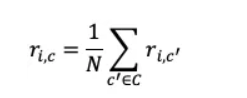

where C is the set of all users C' is the set of all users excluding uj, i is item i


2) Weight 1) by similarity of users to uj 

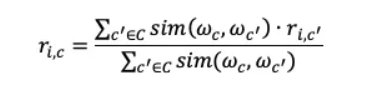


3) One possibility is that different users have different biases for rating - for example u1 might rank everything as 8,9,10 on a scale of 10; whereas u3 is very hard to please and ranks everything as 1,2,3

For this, you can use the same equation as 2) but center (mean subtract) the rankings for every user by the corresponding user mean

This gives the following equation

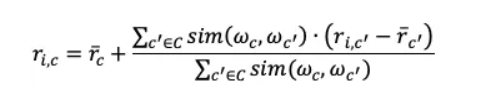

#### Model based collaborative filtering

model-based collaborative filtering use historical data (from other users) to learn a model. For the rating example, a model-based way is to build a linear regression model with user profile as features and rating as target for each item separately

### Embedding approaches for collaborative filtering

#### 1) Matrix Factorization

Simple embedding model. Take the user-item interaction matrix, and try decomposing into a product of user matrix and item matrix

ie A (m * n matrix) is the interaction matrix with m users (or queries) and n items which is given

U (m * d) is a user embedding matrix which you want to learn
 
V (n * d) is an item embedding matrix which you want to learn

Try to decompose A as A = U * V<sup>T</sup>

Something like this

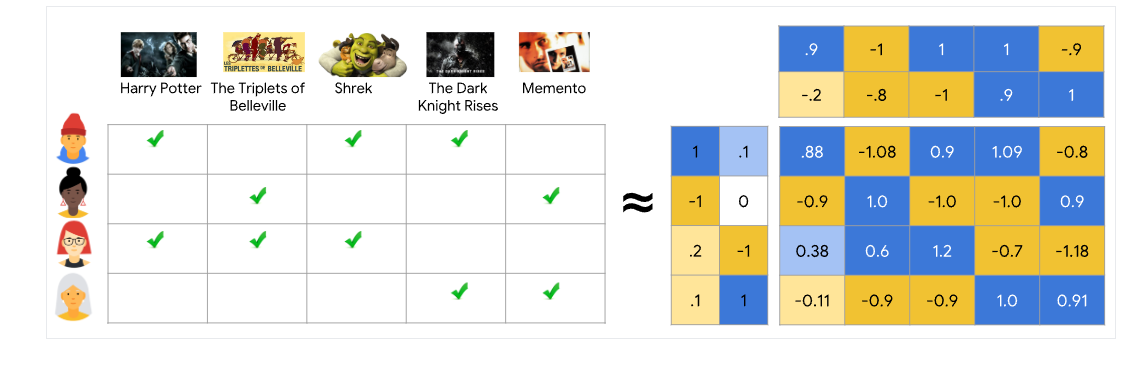



Note that just like LoRA in NLP, or Albert, one additional advantage of matrix factorization is that the RAM memory occupied of U + V is much less than the full matrix A

How do you do this matrix factorization ?  There are 3 ways

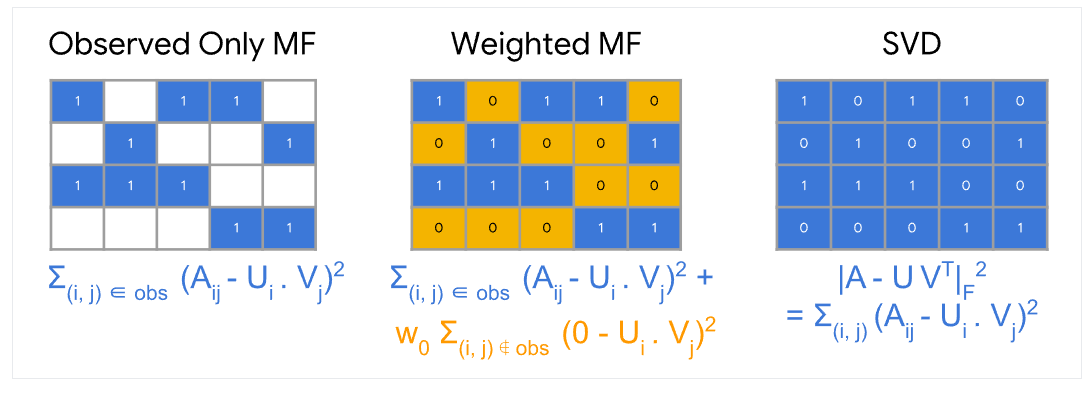

(https://developers.google.com/machine-learning/recommendation/collaborative/matrix)
Preferred is weighted matrix factorization

MF method 1 : The simplest method is observed only MF

Where you just minimize over all pairs of observed entries (ie the non empty values in A)

Giving this equation

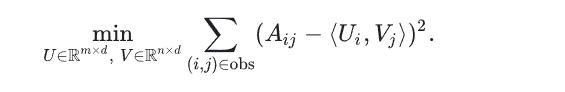

this has 2 disadvantage

1) If A is very sparse, as is often the case, there will be a lot of O's, so you won't have many terms in the loss function above

2) In terms of the loss, it is not good if all the GT labels are 1. a matrix of all ones will have a minimal loss and produce a model that can't make effective recommendations and that generalizes poorly.

MF method 2 : Here, replace the GT in all empty cells in A by 0, and use the same loss, now over all cells instead of observed only cells

This is equivalent to minimizing the squared frobenius distance between A and U * V<sup>T</sup>

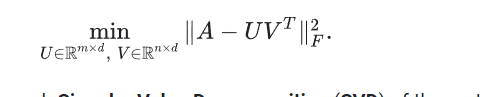



This can be solved using SVD (how) ? 
SVD is not a good solution, because again in real life, A will be very sparse

Leading to the learnt U * V<sup>T</sup> being very close to 0 - thus the model doesn't learn anything

MF method 3 :  Weighted Matrix Factorization 

Same thing as 2 effectively, but you weight the cells with 1 in GT, and cells with 0 in GT differently in the loss function, w is a hyperparameter you can tune

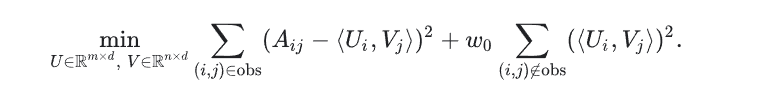

You could also extend this by weighting different training examples differently to prevent very frequent items or heavy users from dominating

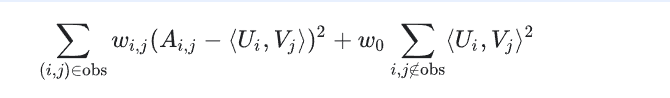

OK. Now you have the loss function (weighted matrix factorization)
How do you solve ?

Using SGD (conventional general method) or WALS (weighted alternating least squares, specific method to solve this problem)

How does WALS work ? Initialize U and V embeddings randomly. Now alternate between - fixing U and solving for V, fixing V and solving for U
Each stage can be solved exactly (via solution of a linear system) and can be distributed. This technique is guaranteed to converge because each step is guaranteed to decrease the loss.



#### SGD vs WALS

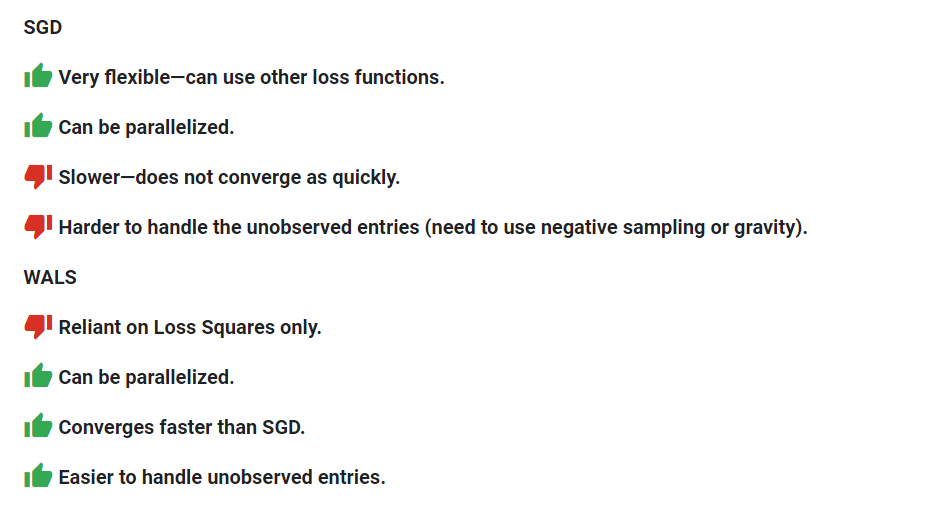


#### Adv and Disadv of Collaborative based filtering

Adv - serendipitous recommendations; that is, collaborative filtering models can recommend an item to user A based on the interests of a similar user B. Furthermore, the embeddings can be learned automatically, without relying on hand-engineering of features.


Disadv - 

1) Data sparsity, for less popular items with few ratings, - for all users (as in  new item for all users) : then  collaborative based filtering cannot solve this

2) New item, which is an extreme case of less popular items : collaborative filtering can't solve this (still better than content based)

(cold start problem)

How do you solve the cold start problem for a new item ?

Projection in WALS : Given a new item  not seen in training, if the system has a few interactions with users, then the system can easily compute an embedding  for this item without having to retrain the whole model. The system simply has to solve the following equation or the weighted version

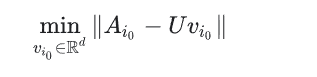

In WALS, since its an alternative iterative method, we can keep the user embeddings U fixed, and just solve for the embedding of a new item

The same can be done for a new user by keeping the item embedding fixed

The previous solution was if a system has few interactions with the new item. If there is no interaction at all, use Heuristics to generate embeddings of fresh items. If the system does not have interactions, the system can approximate its embedding by averaging the embeddings of items from the same category, from the same uploader (in YouTube), and so on.

3) Another main disadv is - its hard to include side features. (extra features outside the user ID, item ID and interactions) - as you can see above, the interaction matrix A is decomposed into U and V. There is no space for additional features.

In WALS, You could do this by augmenting A

Create a new matrix A'
which has
1) one block as A itself (Block 0,0)
2) One block as additional user features (one hot encoding) (Block 0,1)
3) One block as additional item features (one hot encoding) (Block 1,0)
4) Block 1,1 is left empty

Now when we use the equation above, we learn embeddings for side features as well

Note that for similarity measures, cosine distance is often better than dot product as dot product is unnormalized, so it will have a higher no of higher norm values, which are usually popular items

Here's a google colab notebook, try it out in pytorch https://colab.research.google.com/github/google/eng-edu/blob/main/ml/recommendation-systems/recommendation-systems.ipynb?utm_source=ss-recommendation-systems&utm_campaign=colab-external&utm_medium=referral&utm_content=recommendation-systems

#### Neural Networks

One solution is to use a softmax. 

The input is the user query.
The output is a probability vector with size equal to the number of items in the corpus, representing the probability to interact with each item; for example, the probability to click on or watch a YouTube video.

wow - isn't that too many items in the softmax layer, so very expensive ?

The input to a DNN can include:

dense features (for example, watch time and time since last watch)
sparse features (for example, watch history and country)
you can also add additional features like age or country

Let this be the model architecture

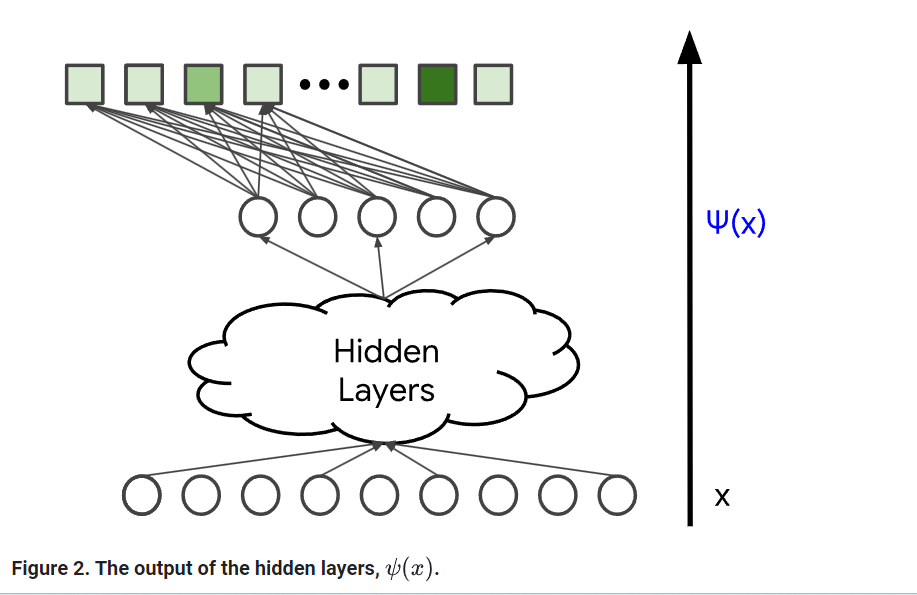

You have user features as an input at the bottom, and the output of the last hidden layer are psi(x), of dimension d

add the softmax layer on top of this

so you want to map dimension d to dimension V (no of items), have a weight matrix of dimension d * V

so final output logits is of dimension 1 * V over which we take softmax

Now, if d is the embedding dimension and we have V items,
we can actually take the transpose of weight matrix of dimension d * V to get a V * d matrix at the output layer which isn nothing but the embedding layer !!!


You can view psi(x) as the user/query embedding, and output weight matrix as item embedding

Note that unlike MF, where you learn user/query embedding and item embedding directly for every user and item respectively

Here you learn item embedding directly for evern item (the weight matrix) - but for input embedding, you don't directly learn it, instead you learn a mapping function psi which takes an input x and converts it to an input embedding



One clear disadvantage of this is the softmax expense if you have millions of items

One alternative NN approach is the two tower model

Have one NN for item, one for user

take a dot product of the representations of both as a loss function

1) One neural network maps query features  to query embedding  of dimension Rd ie psi(user)
2) Another neural network maps item features to item embedding of same dimension Rd ie phi(item)
3) Output is dotproduct of both <psi(user), phi(item)>
4) some kind of contrastive divergence loss


Comparison between matrix factorization and NN

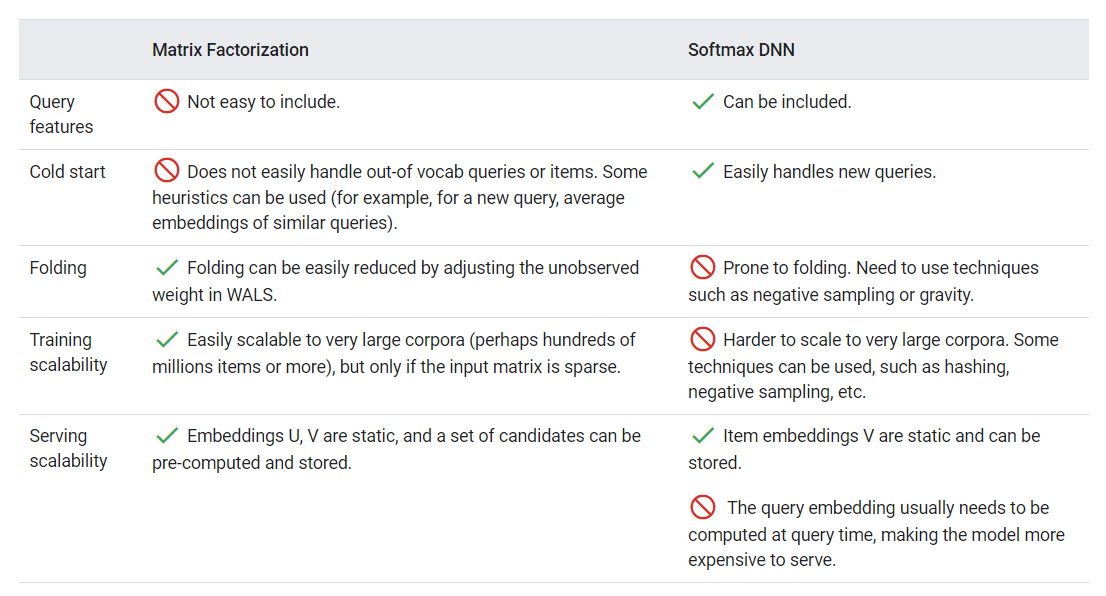

In short

1) Matrix factorization is usually the better choice for large corpora. It is easier to scale, cheaper to query, and less prone to folding.
2) DNN models can better capture personalized preferences, but are harder to train and more expensive to query. DNN models are preferable to matrix factorization for scoring because DNN models can use more features to better capture relevance. Also, it is usually acceptable for DNN models to fold, since you mostly care about ranking a pre-filtered set of candidates assumed to be relevant.

## Hybrid methods (combining both)

1) Approach 1 : implement content based model and collaborative model separately, combine their outputs

2) Approach 2 : Incorporate content-based characteristics into a collaborative method.

3) Approach 3 : Incorporate collaborative characteristics into a content-based method

4) Approach 4 : A cross-user and cross-item model. This is to build a model with both item features and user features as inputs, such as linear regression model, tree model, neural network model, etc

## Retrieval

Suppose you have an embedding model. Given a user, how would you decide which items to recommend?

At serve time

1) If you are using a statistical model like Matrix factorization, you know embeddings of all queries/users beforehand . So you just read it
2) For a DNN model, the system computes the query embedding  at serve time by running the network on the feature vector 

Once you have the query embedding ,search for item embeddings that are close to in the embedding space.

For classical methods, you have the user/query embedding beforehand, for NN methods, you compute it in real time and use ANN (which we have already seen before - FAISS with PQ, HNSW, LSH, etc) to find distance




## Scoring

Once candidates are generated, use another model which ranks generated candidates,   select the set of items to display.

Here, you can use many features , such as 
1) Related items from a matrix factorization model.
2) User features that account for personalization.
3) "Local" vs "distant" items; that is, taking geographic information into account.
4) Popular or trending items.
5) A social graph; that is, items liked or recommended by friends.

combines these different sources into a common pool of candidates that are then scored by a single model and ranked according to that score

For example, the system can train a model to predict the probability of a user watching a video on YouTube given the following:

query features (for example, user watch history, language, country, time)
video features (for example, title, tags, video embedding)
The system can then rank the videos in the pool of candidates according to the prediction of the model.




What should you optimize on ?
Pros and cons -
1)Maximize  CTR for ads - you might give clickbaity stuff, which spoils user experience
2) Maximize watch time - can be prone to recommend too long videos
3) Increase diversity and maximize session watch time - may recommend diverse and short videos which enhance user experience

How do you deal with this ?




### Positional bias

Generally, users click the top item(s) and ignore items at bottom even if they are better suited. 

Unfortunately, because of positional bias, it is difficult to know whether the users engagement was because the item was relevant or because the item was ranked high.
Additionally, in offline training when the model is trained on historical data, we are reinforcing this bias through the feedback loop.


When scoring videos or ads, the system does not know which position the ad is going to be placed in. 

1) Create position independent rankings
2) Rank all the candidates as if they are in the top position on the screen.

1) Create position independent rankings
2) Rank all the candidates as if they are in the top position on the screen.


https://vinija.ai/recsys/position-bias/

### Measuring positional bias

1) analyzing the click-through rate (CTR) or conversion rate of items at different positions in the recommendation list for the user

2) Randomize the predicted items (good way to figure out impact of positional bias but terrible for business, so don't prefer) - called RandN

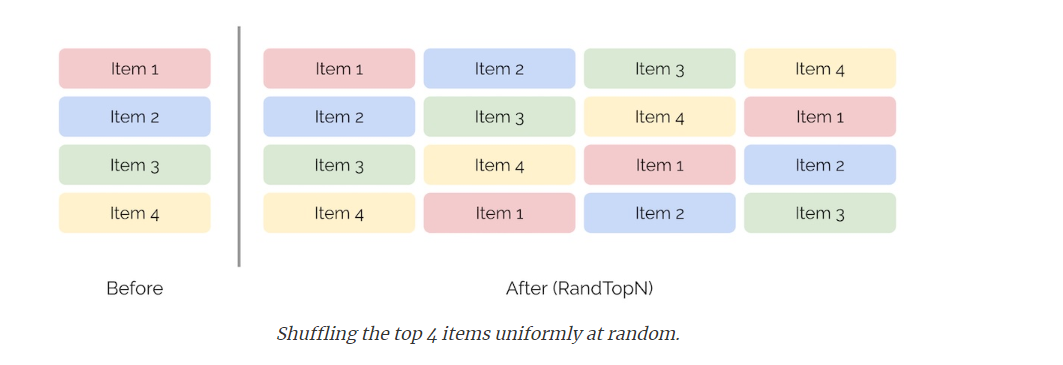

3) If we had multiple rankers in production historically, or even currently ( a netflix view which has 2-3 widges, one with all movies, one with trending  movies); where the same item with the same user was displayed at different positions, we can use this to figure out positional bias 

4)  infer position bias via expectation maximization (https://dl.acm.org/doi/10.1145/3159652.3159732) : Have a model which assumes that  an item is clicked only if it is examined and relevant; examination depends only on the position while relevance depends only on the context and item. Observe click through rate, and based on the above model use EM to estimate positional bias

5) Slight randomness : For example, FairPairs swaps items at positions k and k+1 while RandPair swaps items at positions 1 and k.



### Correcting for positional bias

once we learn positional bias from these methods above, we can correct for it in our models to fix it 
1) Approach 1 : weighting the training data with inverse propensity scores, which are based on the likelihood of an item being displayed in a certain position, this helps adjust for the fact that  items in different positions have different probabilities of being clicked

2) Approach 2: Including positional features in our models. These positional features help the model learn how position affects reward. Then, during serving, we can set all items to have positional feature = 1 to negate the impact of position

## Reranking

Third step which is applied after retrieval and ranking

1)  system can re-rank the candidates to consider additional criteria or constraints. One re-ranking approach is to use filters that remove some candidates.

Example 1 :

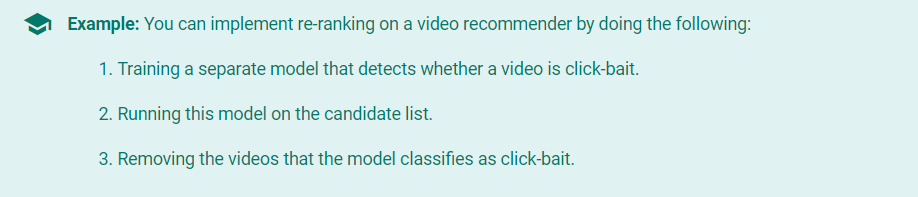

Example 2 :

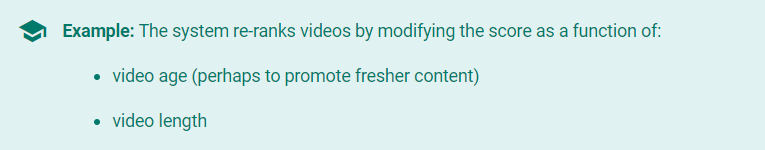



## Incorporating freshness, diversity, fairness in reranking



## Freshness

Most recommendation systems aim to incorporate the latest usage information, such as current user history and the newest items. Keeping the model fresh helps the model make good recommendations.

Solutions

1) Retrain as often as possible. warm-starting the training so that the model does not have to re-learn from scratch (with embeddings learnt from previous step)

2) Create an "average" user to represent new users in matrix factorization models. You don't need the same embedding for each user—you can create clusters of users based on user features - For example, new users in India get one embedding, etc

3) Use a DNN such as a softmax model or two-tower model. Since the model takes feature vectors as input, it can be run on a query or item that was not seen during training.

4) Add document age as a feature



## Diversity

You don't want youtube to recommend exactly what you watched before but other things

Solutions:

1) Train multiple candidate generators using different sources.
2) Train multiple rankers using different objective functions.
3) Re-rank items based on genre or other metadata to ensure diversity.

## Fairness

1) Train ML models on comprehensive data sets. Add auxiliary data when your data is too sparse (for example, when certain categories are under-represented).

2) Separate models for underserved groups

3) Track metrics (for example, accuracy and absolute error) on each demographic to watch for biases.


## Exposure bias in recommendation systems

Touched upon this already in the sections on positional bias (which is a kind of exposure bias), and diversity

The basic thing is - out of 10K items, you show only 50 to the user, and the user will look at only 10 of them and give implicit / explicit feedback on it. So if you're not careful, you'll be showing the same thing again and again, because you have no feedback on the other items !!

There are a few differnet ways to tackle this as per here - https://www.youtube.com/watch?v=j0lzd-82ENA

1) During model training itself account for this bias (We saw this in one of the approaches on positional bias (pasting here from above - Including positional features in our models. These positional features help the model learn how position affects reward. Then, during serving, we can set all items to have positional feature = 1 to negate the impact of position)

2) Choose features in your model which are not bad. What does bad mean ? For example, if you use no of impressions as a feature to the model, that is terrible, because it creates a vicious cycle - you train based on no of impressions, and then display based on it, and that directly is fed back to model as feedback
Better would be click through rate (clicks are not 100% correlated with impressions)
No of clicks is also not great (though better than no of impressions), and is a biased feature, as when you show something more times, there is more chance of getting clicks

3) Debias what you show in the output (after the model has been built) - by increasing diversity, fairness, recency
(which we already saw in the section above)




## Misc notes

1) Why do we have a two step process, and not allow the candidate model to directly score ? 
a) With a smaller pool of candidates, the system can afford to use more features and a more complex model that may better capture context.
b) Some systems rely on multiple candidate generators. The scores of these different generators might not be comparable.

2) Some recommender systems are very time sensitive (e.g., news feed) or subject to seasonality (travel destination recommendations). For these systems, we might need to consider building time series model (e.g., ARIMA, RNN).



## References

1) https://towardsdatascience.com/recommendation-systems-a-review-d4592b6caf4b#:~:text=Ranking%20algorithms%20rely%20on%20search,might%20not%20have%20found%20otherwise.

2) https://developers.google.com/machine-learning/recommendation/ - Nice course by google

3) On positional bias https://vinija.ai/recsys/position-bias/, https://eugeneyan.com/writing/position-bias/

4) On exposure bias and ways to handle https://www.youtube.com/watch?v=j0lzd-82ENA